<a href="https://colab.research.google.com/github/torresmariaemilia21/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: arma un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Arte", "Música",
    "Filosofía", "Sociología", "Informática"
]

# Crear una lista de apellidos y nombres ficticios
apellidos = ["Gómez", "Rodríguez", "Pérez", "García", "López", "Fernández", "Martínez", "Sánchez", "Álvarez", "Díaz"]
nombres = ["Juan", "María", "Carlos", "Ana", "Pedro", "Laura", "Luis", "Marta", "Javier", "Isabel"]

# Generar datos aleatorios
datos = []
for _ in range(100):
  apellido = random.choice(apellidos)
  nombre = random.choice(nombres)
  dni = random.randint(10000000, 99999999)
  materia = random.choice(materias)
  nota1 = random.randint(1, 10)
  nota2 = random.randint(1, 10)
  nota3 = random.randint(1, 10)
  faltas = random.randint(0, 20)
  datos.append([apellido, nombre, dni, materia, nota1, nota2, nota3, faltas])

# Crear el DataFrame
df = pd.DataFrame(datos, columns=["Apellido", "Nombre", "Nro_DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a clases"])

# Mostrar el DataFrame
df

,Apellido,Nombre,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,García,Javier,18851467,Lengua y Literatura,9,5,5,2
1,López,Juan,31910240,Arte,10,5,3,17
2,Díaz,Isabel,54425015,Matemática,1,5,10,4
3,Pérez,Javier,51898834,Sociología,8,2,3,11
4,García,Carlos,64933390,Inglés,4,10,5,5
...,...,...,...,...,...,...,...,...
95,García,María,28777003,Lengua y Literatura,5,5,4,1
96,Gómez,Isabel,27328492,Ciencias Naturales,4,6,10,6
97,Fernández,Javier,73368539,Química,4,7,5,0
98,López,Laura,62108926,Química,4,9,10,3


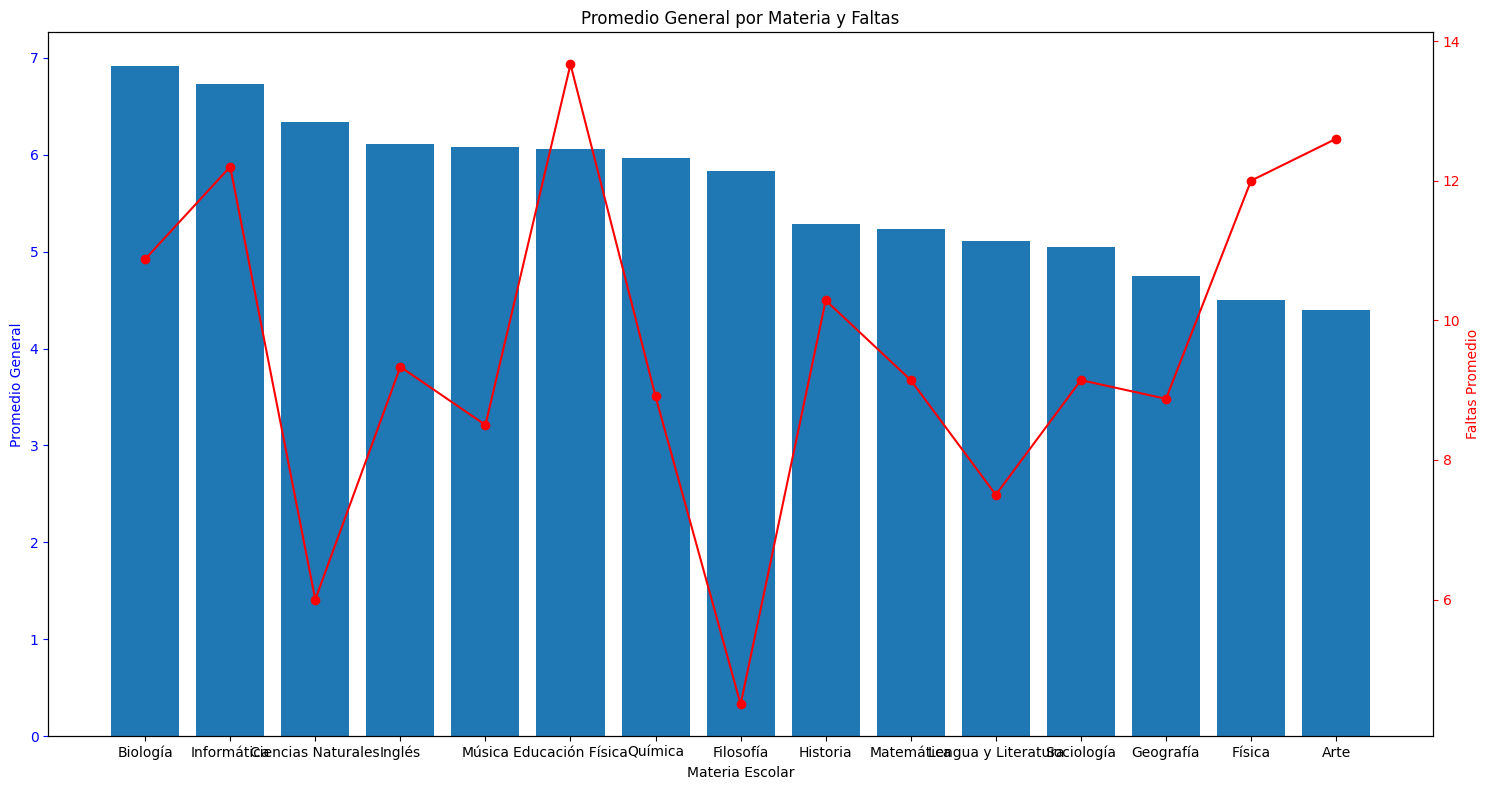

In [ ]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt

# Calcular el promedio general de cada materia
promedio_por_materia = df.groupby('Materia Escolar').agg({'Nota 1er Trimestre': 'mean', 'Nota 2do Trimestre': 'mean', 'Nota 3er Trimestre': 'mean', 'Faltas a clases': 'mean'})
promedio_por_materia['Promedio General'] = (promedio_por_materia['Nota 1er Trimestre'] + promedio_por_materia['Nota 2do Trimestre'] + promedio_por_materia['Nota 3er Trimestre']) / 3

# Ordenar las materias por promedio general de mayor a menor
promedio_por_materia = promedio_por_materia.sort_values('Promedio General', ascending=False)

# Crear el gráfico de barras
fig, ax1 = plt.subplots(figsize=(15, 8))

ax1.bar(promedio_por_materia.index, promedio_por_materia['Promedio General'])
ax1.set_xlabel('Materia Escolar')
ax1.set_ylabel('Promedio General', color='blue')
ax1.tick_params('y', colors='blue')
ax1.set_title('Promedio General por Materia y Faltas')

# Agregar las faltas en el segundo eje
ax2 = ax1.twinx()
ax2.plot(promedio_por_materia.index, promedio_por_materia['Faltas a clases'], color='red', marker='o')
ax2.set_ylabel('Faltas Promedio', color='red')
ax2.tick_params('y', colors='red')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [7]:
df.to_csv("datos_alumnos.csv", index=False)